<a href="https://colab.research.google.com/github/willy-arison/Cryptography/blob/main/customer_segmentation(CRM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# import module
from google.colab import drive
import pandas as pd

# mount drive
drive.mount('/content/drive')

# path for the file
file_path_sellout = "/content/drive/MyDrive/widget (22).csv"

# read the data
df = pd.read_csv(file_path_sellout)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
df.shape

(109705, 16)

In [175]:
df.isna().sum()

,0
Marque,34
condi,0
Id Code Promo,0
IdMembre,0
CanalInscription,829
Origine,0
Genre,3
Age,7141
PaysLivraison,0
Jours dans DateInscription,0


# Data Distribution

In [176]:
# Clean Age
df = df[(df['Age'] > 0)]

# Standardize Genre
df['Genre'] = df['Genre'].str.capitalize()
df['Genre'] = df['Genre'].fillna('Other')

# Fill missing location info if necessary
df['PaysLivraison'] = df['PaysLivraison'].fillna('Unknown')
df['VilleLivraison'] = df['VilleLivraison'].fillna('Unknown')

In [177]:
df.shape

(102534, 16)

In [178]:
bins = [0, 17, 25, 35, 45, 55, 65, 150]
labels = ['<18','18-25','26-35','36-45','46-55','56-65','65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [179]:
df.shape

(102534, 17)

In [180]:
# Gender distribution
gender_counts = df['Genre'].value_counts(normalize=True)*100
print(gender_counts)


Genre
Female    62.716757
Male      32.154212
None       5.126105
Other      0.002926
Name: proportion, dtype: float64


In [181]:
# Age distribution
age_counts = df['AgeGroup'].value_counts(normalize=True)*100
print(age_counts)

AgeGroup
36-45    27.628884
26-35    25.401330
46-55    20.649736
56-65    12.610451
18-25     7.247352
65+       5.928765
<18       0.533482
Name: proportion, dtype: float64


In [182]:
# Country distribution
country_counts = df['PaysLivraison'].value_counts(normalize=True)*100
print(country_counts)

PaysLivraison
France              98.556576
Belgique             1.170343
Suisse               0.119960
Luxembourg           0.113133
Réunion              0.019506
Guadeloupe           0.017555
Saint-Barthélémy     0.002926
Name: proportion, dtype: float64


In [183]:
# City distribution
city_counts = df['VilleLivraison'].value_counts(normalize=True)*100
print(city_counts)


VilleLivraison
Paris                  7.202489
Marseille              1.524372
Lyon                   1.241539
Toulouse               0.909942
paris                  0.775353
                         ...   
Hillion                0.001951
AVRAINVILLE            0.001951
Coslédaà-Lube-Boast    0.001951
Gouffern en Auge       0.001951
NÎMES                  0.001951
Name: proportion, Length: 10474, dtype: float64


In [184]:
demo_table = pd.pivot_table(df,
                            index=['Genre', 'AgeGroup'],
                            columns='PaysLivraison',
                            values='IdMembre',
                            aggfunc='count',
                            fill_value=0)


/tmp/ipython-input-2053082439.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  demo_table = pd.pivot_table(df,


In [185]:
demo_table

PaysLivraison    Belgique  France  Guadeloupe  Luxembourg  Réunion  \
Genre  AgeGroup                                                      
Female <18              0     300           0           0        0   
       18-25           65    4397           0           0        0   
       26-35          123   15530           0          11       11   
       36-45          201   17566           4          23        0   
       46-55          174   13255           0          15        0   
       56-65          122    8506           0           4        0   
       65+             69    3825           0          10        0   
Male   <18              0     149           0           0        0   
       18-25           28    2285           0           3        0   
       26-35          135    8473           0           0        3   
       36-45           79    9047          14          24        0   
       46-55           61    6643           0          10        6   
       56-65           70    3880           0           0        0   
       65+             15    2016           0           0        0   
None   <18              0      93           0           5        0   
       18-25            7     631           0           0        0   
       26-35           19    1694           0           4        0   
       36-45           10    1326           0           5        0   
       46-55           15     976           0           2        0   
       56-65            5     330           0           0        0   
       65+              2     129           0           0        0   
Other  <18              0       0           0           0        0   
       18-25            0       0           0           0        0   
       26-35            0       0           0           0        0   
       36-45            0       0           0           0        0   
       46-55            0       0           0           0        0   
       56-65            0       3           0           0        0   
       65+              0       0           0           0        0   

PaysLivraison    Saint-Barthélémy  Suisse  
Genre  AgeGroup                            
Female <18                      0       0  
       18-25                    0      15  
       26-35                    0      25  
       36-45                    0      26  
       46-55                    0      11  
       56-65                    3       5  
       65+                      0      10  
Male   <18                      0       0  
       18-25                    0       0  
       26-35                    0      17  
       36-45                    0       4  
       46-55                    0       5  
       56-65                    0       2  
       65+                      0       0  
None   <18                      0       0  
       18-25                    0       0  
       26-35                    0       0  
       36-45                    0       0  
       46-55                    0       0  
       56-65                    0       0  
       65+                      0       3  
Other  <18                      0       0  
       18-25                    0       0  
       26-35                    0       0  
       36-45                    0       0  
       46-55                    0       0  
       56-65                    0       0  
       65+                      0       0

In [186]:
df['Marque'].nunique()

1662

# Revenue

/tmp/ipython-input-3802328892.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age = df.groupby('AgeGroup')['CA net'].sum().reset_index()


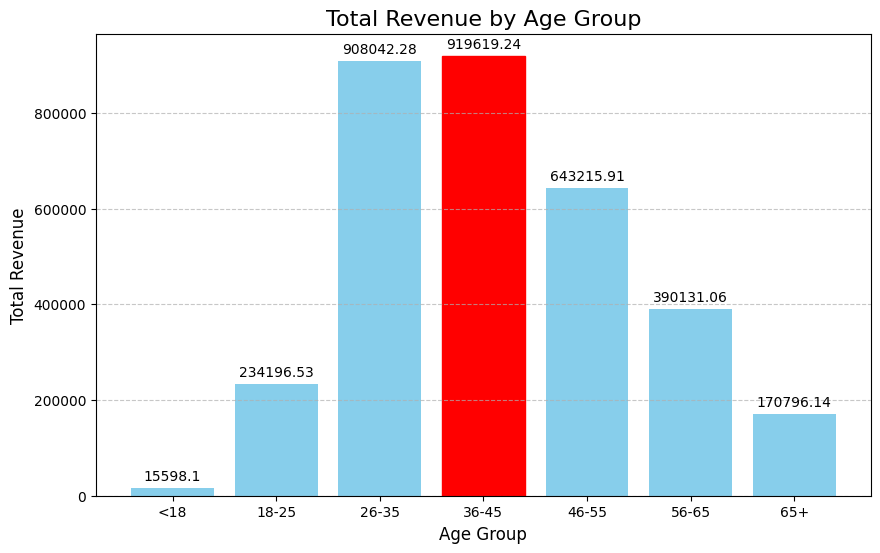

In [187]:
import matplotlib.pyplot as plt


# Aggregate total revenue by age group
revenue_by_age = df.groupby('AgeGroup')['CA net'].sum().reset_index()

age_order = ['<18','18-25','26-35','36-45','46-55','56-65','65+']
revenue_by_age['AgeGroup'] = pd.Categorical(revenue_by_age['AgeGroup'], categories=age_order, ordered=True)
revenue_by_age = revenue_by_age.sort_values('AgeGroup')

max_idx = revenue_by_age['CA net'].idxmax()

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(revenue_by_age['AgeGroup'], revenue_by_age['CA net'], color='skyblue')


bars[max_idx].set_color('red')

for i, value in enumerate(revenue_by_age['CA net']):
    plt.text(i, value + revenue_by_age['CA net'].max()*0.01, f'{value}', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Total Revenue by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [188]:
columns_to_group = ['Marque', 'condi', 'CanalInscription', 'Origine',
                    'Genre', 'PaysLivraison', 'VilleLivraison', 'AgeGroup']


In [189]:
revenue_summary = {}

for col in columns_to_group:
    revenue_per_col = df.groupby(col)['CA net'].sum().reset_index().sort_values('CA net', ascending=True)
    revenue_summary[col] = revenue_per_col
    print(f"\n=== Total Revenue by {col} ===")
    print(revenue_per_col)



=== Total Revenue by Marque ===
                        Marque     CA net
1645                     Yours       0.00
35                       Aigle       0.00
569                        GHD       0.00
560            Francesco Russo       0.00
1484                   Suzanne       0.00
...                        ...        ...
759                      Jonak   58327.88
1635                Wooden Art   68064.81
1083  Micadoni Limited Edition   73939.09
595                       Geox   94627.65
1113         Mode de Transport  235058.76

[1662 rows x 2 columns]

=== Total Revenue by condi ===
  condi      CA net
0   non  1381557.25
1   oui  1900042.01

=== Total Revenue by CanalInscription ===
  CanalInscription      CA net
3           tablet    62519.29
1            phone   503152.88
0          desktop  1150858.98
2       sitemobile  1550598.08

=== Total Revenue by Origine ===
     Origine      CA net
0  bazarchic  3281599.26

=== Total Revenue by Genre ===
    Genre      CA net
3   Other 

/tmp/ipython-input-542261003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_col = df.groupby(col)['CA net'].sum().reset_index().sort_values('CA net', ascending=True)


# Marque which our customer did not interested more

In [190]:
df_Marque = revenue_summary['Marque']
marque_not_interesting = df_Marque[df_Marque['CA net'] == 0.00]

# Ville where CA net = 0 (Localisation of customer where did not bring anything in company's revenue)

In [191]:
df_ville = revenue_summary['VilleLivraison']
ville_no_revenue = df_ville[df_ville['CA net'] == 0.00]

# Marque the most purchased grouped by age group

In [192]:
revenue_by_age_marque = df.groupby(['AgeGroup', 'Marque'])['CA net'].sum().reset_index()

revenue_by_age_marque = revenue_by_age_marque.sort_values(['AgeGroup', 'CA net'], ascending=[True, False])

/tmp/ipython-input-2018380332.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_marque = df.groupby(['AgeGroup', 'Marque'])['CA net'].sum().reset_index()


In [193]:
revenue_by_age_marque[revenue_by_age_marque['AgeGroup'] == "36-45"]

,AgeGroup,Marque,CA net
6099,36-45,Mode de Transport,65940.24
5581,36-45,Geox,32523.20
6069,36-45,Micadoni Limited Edition,23074.14
6621,36-45,Wooden Art,21716.54
5206,36-45,Bobochic,20239.16
...,...,...,...
6632,36-45,Youyou,0.00
6637,36-45,Zadig & Voltaire,0.00
6642,36-45,Zen ethic,0.00
6645,36-45,Zuiver,0.00


# Number of clients per month

In [194]:
# Convert to datetime if not already
df['Jours dans DateInscription'] = pd.to_datetime(df['Jours dans DateInscription'], errors='coerce')
df = df.dropna(subset=['Jours dans DateInscription'])

In [195]:
# Convert to datetime if not already
df['Jours dans DateInscription'] = pd.to_datetime(df['Jours dans DateInscription'], errors='coerce')
df = df.dropna(subset=['Jours dans DateInscription'])

# Extract year-month
df['YearMonth'] = df['Jours dans DateInscription'].dt.to_period('M')

# Count unique clients per month
clients_per_month = df.groupby('YearMonth')['IdMembre'].nunique().reset_index()
clients_per_month.rename(columns={'IdMembre':'NumClients'}, inplace=True)

# Convert YearMonth to string for plotting
clients_per_month['YearMonth'] = clients_per_month['YearMonth'].astype(str)

print(clients_per_month)


   YearMonth  NumClients
0    2023-01         686
1    2023-02         637
2    2023-03         615
3    2023-04         696
4    2023-05         675
5    2023-06         635
6    2023-07         577
7    2023-08         545
8    2023-09         533
9    2023-10         575
10   2023-11         591
11   2023-12         596
12   2024-01         282
13   2024-02         307
14   2024-03         301
15   2024-04         279
16   2024-05         289
17   2024-06         265
18   2024-07         286
19   2024-08         266
20   2024-09         275
21   2024-10         269
22   2024-11         283
23   2024-12         277
24   2025-01          90
25   2025-02         104
26   2025-03          77
27   2025-04          94
28   2025-05          76
29   2025-06          79
30   2025-07          97
31   2025-08         136
32   2025-09         116
33   2025-10          99
34   2025-11          81
35   2025-12         130


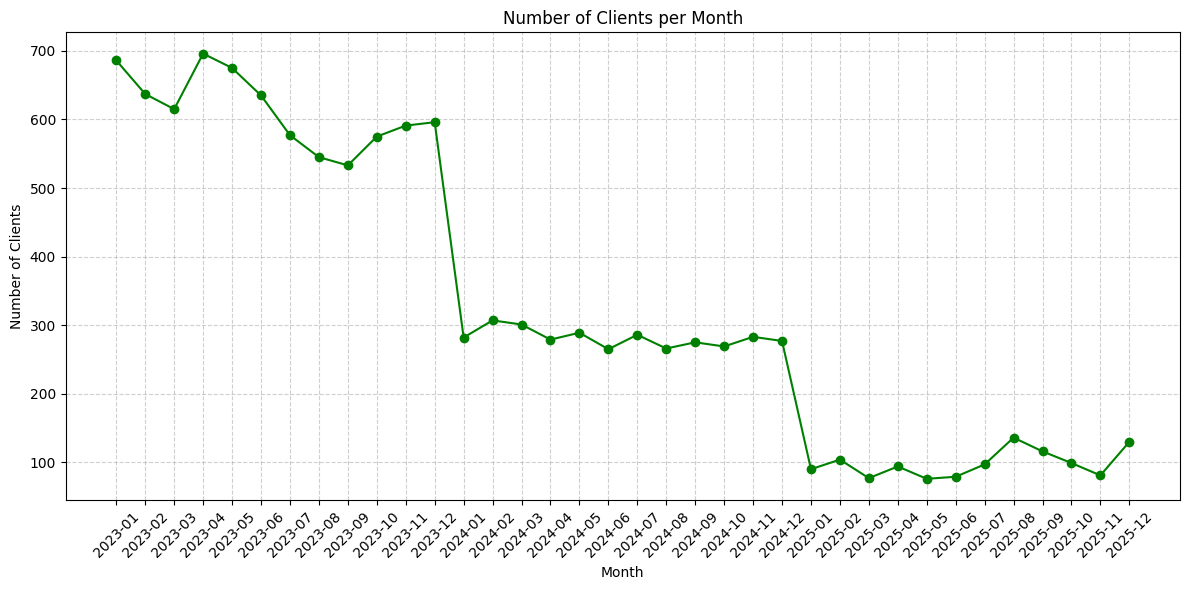

In [196]:
plt.figure(figsize=(12,6))
plt.plot(clients_per_month['YearMonth'], clients_per_month['NumClients'], marker='o', linestyle='-', color='green')
plt.title('Number of Clients per Month')
plt.xlabel('Month')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Number of clients per month with the total revenue per month

In [197]:
# Total revenue per month
revenue_per_month = df.groupby('YearMonth')['CA net'].sum().reset_index()
revenue_per_month.rename(columns={'CA net':'TotalRevenue'}, inplace=True)

# Number of unique clients per month
clients_per_month = df.groupby('YearMonth')['IdMembre'].nunique().reset_index()
clients_per_month.rename(columns={'IdMembre':'NumClients'}, inplace=True)

# Merge the two for plotting together
monthly_summary = pd.merge(revenue_per_month, clients_per_month, on='YearMonth')

# Convert YearMonth to string for plotting
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)

print(monthly_summary)


   YearMonth  TotalRevenue  NumClients
0    2023-01      71086.81         686
1    2023-02      77410.00         637
2    2023-03      68573.62         615
3    2023-04      84854.63         696
4    2023-05      84211.79         675
5    2023-06      81271.33         635
6    2023-07      65816.40         577
7    2023-08      70566.55         545
8    2023-09      67473.59         533
9    2023-10      73234.81         575
10   2023-11      77622.80         591
11   2023-12      75138.61         596
12   2024-01      39165.55         282
13   2024-02      35971.84         307
14   2024-03      32169.09         301
15   2024-04      31654.73         279
16   2024-05      28565.28         289
17   2024-06      27310.98         265
18   2024-07      33826.78         286
19   2024-08      29764.54         266
20   2024-09      31107.88         275
21   2024-10      31257.60         269
22   2024-11      29995.34         283
23   2024-12      30480.23         277
24   2025-01      10014.3

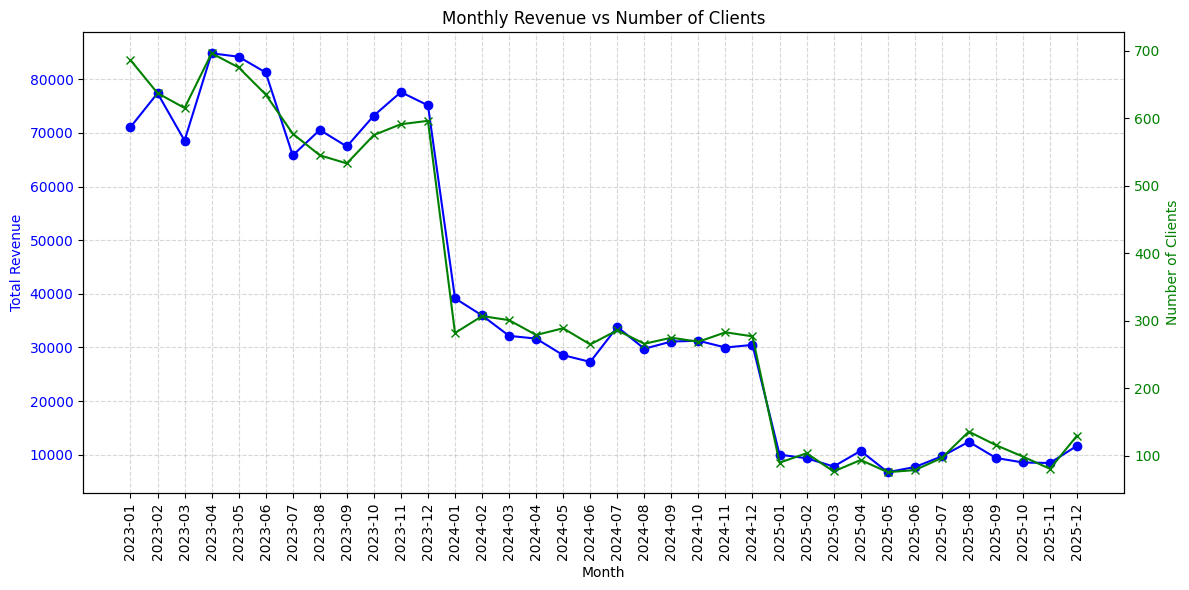

In [198]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Total Revenue
ax1.plot(monthly_summary['YearMonth'], monthly_summary['TotalRevenue'], color='blue', marker='o', label='Total Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot Number of Clients on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_summary['YearMonth'], monthly_summary['NumClients'], color='green', marker='x', label='Number of Clients')
ax2.set_ylabel('Number of Clients', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Rotate x-axis labels vertically
for label in ax1.get_xticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')  # optional, center-align the labels

plt.title('Monthly Revenue vs Number of Clients')
fig.tight_layout()
plt.show()


In [199]:
df.head()

,Marque,condi,Id Code Promo,IdMembre,CanalInscription,Origine,Genre,Age,PaysLivraison,Jours dans DateInscription,Jours dans DateDerniereCNX,Jours dans date_derniere_action_email,VilleLivraison,BZC,CA net,Qty,AgeGroup,YearMonth
0,NaN,oui,83,24149321,desktop,bazarchic,Female,53.0,France,2023-08-01,30/05/2024,15/09/2025,Guéret,2,13.33,1,46-55,2023-08
10,NaN,oui,83,24711220,NaN,bazarchic,None,62.0,France,2023-02-06,06/03/2025,12/09/2025,Vieux-charmont,2,13.33,1,56-65,2023-02
11,NaN,oui,83,24821074,desktop,bazarchic,Male,34.0,France,2023-07-07,19/08/2024,NaN,Vichy,2,13.33,1,26-35,2023-07
14,NaN,oui,83,25104778,desktop,bazarchic,Female,70.0,Belgique,2023-10-10,16/10/2023,17/03/2024,Walhain,2,13.22,1,65+,2023-10
17,NaN,oui,83,25253887,desktop,bazarchic,Female,59.0,France,2023-09-11,28/01/2024,28/11/2024,Annecy,2,13.33,1,56-65,2023-09


# Product existed in 2023 but not in 2024 and 2025

,proportion
Id Code Promo,
83,58.464406
2272,23.595479
2266,3.527904
5,3.353140
3085,1.554235
...,...
2749,0.004660
1472,0.004660
1880,0.004660
